In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

df=pd.read_csv(r"C:\Users\sriga\Downloads\archive (2)\airline-passengers.csv")

In [5]:
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

df.head()

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   total_passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


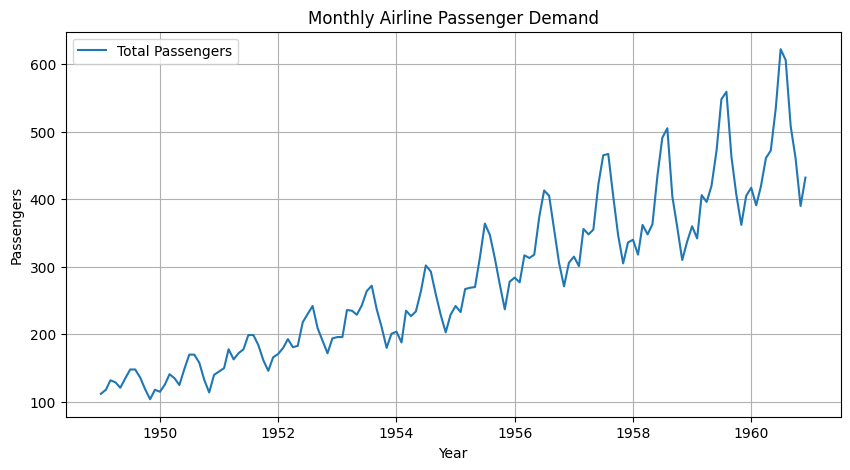

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df, label="Total Passengers")
plt.title("Monthly Airline Passenger Demand")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()


In [8]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

adf_test(df['total_passengers'])


ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


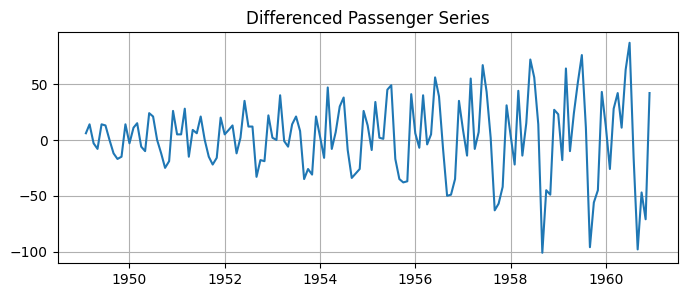

In [24]:
df_diff = df['total_passengers'].diff().dropna()

plt.figure(figsize=(8,3))
plt.plot(df_diff)
plt.title("Differenced Passenger Series")
plt.grid()
plt.show()


In [10]:
adf_test(df_diff)


ADF Statistic: -2.8292668241699994
p-value: 0.0542132902838255


<Figure size 1200x500 with 0 Axes>

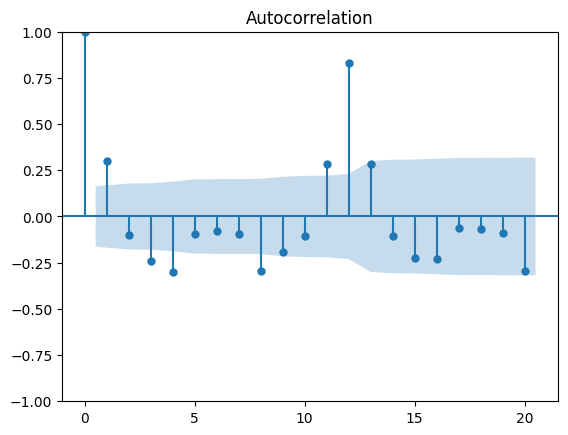

<Figure size 1200x500 with 0 Axes>

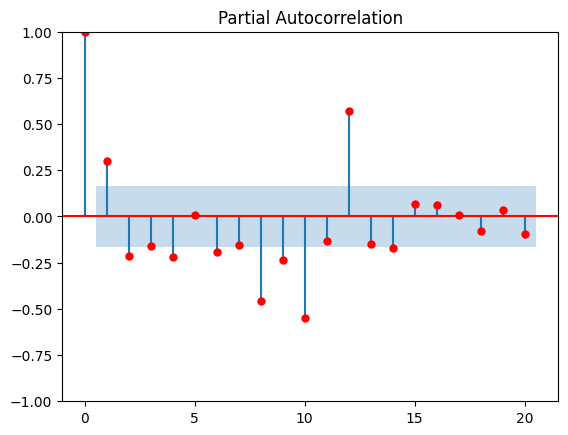

In [17]:
plt.figure(figsize=(12,5))
plot_acf(df_diff, lags=20)
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(df_diff, lags=20,color='red')
plt.show()


In [18]:
train = df.iloc[:-12]
test = df.iloc[-12:]

print(train.shape)
print(test.shape)


(132, 1)
(12, 1)


In [19]:
model = ARIMA(train['total_passengers'], order=(1,1,1))
model_fit = model.fit()

model_fit.summary()


C:\Users\sriga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sriga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sriga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       total_passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -625.518
Date:                Fri, 06 Feb 2026   AIC                           1257.035
Time:                        11:37:35   BIC                           1265.661
Sample:                    01-01-1949   HQIC                          1260.540
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5436      0.100     -5.443      0.000      -0.739      -0.348
ma.L1          0.9272      0.051     18.336      0.000       0.828       1.026
sigma2       816.5398     95.147      8.582      0.000     630.056    1003.024
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 2.51
Prob(Q):                              0.57   Prob(JB):                         0.29
Heteroskedasticity (H):               6.76   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
forecast = model_fit.forecast(steps=12)
forecast


1960-01-01    433.451927
1960-02-01    417.984221
1960-03-01    426.393139
1960-04-01    421.821685
1960-05-01    424.306927
1960-06-01    422.955841
1960-07-01    423.690350
1960-08-01    423.291039
1960-09-01    423.508122
1960-10-01    423.390106
1960-11-01    423.454265
1960-12-01    423.419385
Freq: MS, Name: predicted_mean, dtype: float64

In [21]:
rmse = np.sqrt(mean_squared_error(test['total_passengers'], forecast))
print("RMSE:", rmse)


RMSE: 91.22883941630958


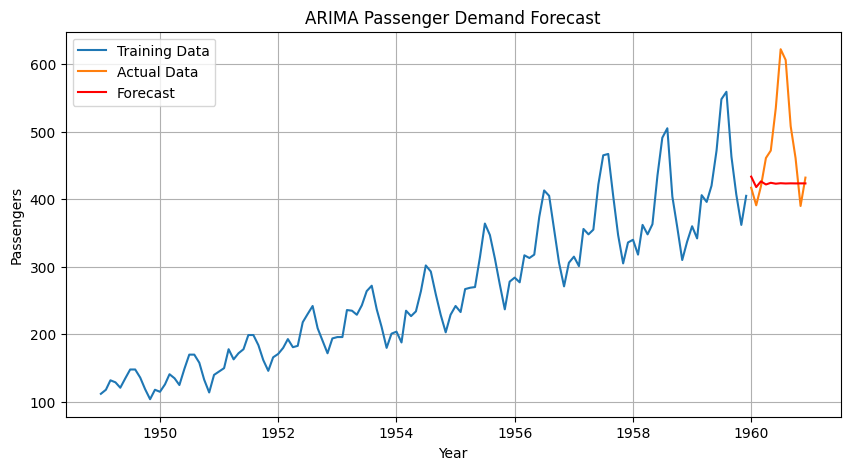

In [22]:
plt.figure(figsize=(10,5))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Data")
plt.plot(forecast, label="Forecast", color='red')
plt.title("ARIMA Passenger Demand Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()


In [23]:
future_forecast = model_fit.forecast(steps=12)
future_forecast


1960-01-01    433.451927
1960-02-01    417.984221
1960-03-01    426.393139
1960-04-01    421.821685
1960-05-01    424.306927
1960-06-01    422.955841
1960-07-01    423.690350
1960-08-01    423.291039
1960-09-01    423.508122
1960-10-01    423.390106
1960-11-01    423.454265
1960-12-01    423.419385
Freq: MS, Name: predicted_mean, dtype: float64